# その他
1. Normalize
1. JpegCompression
1. ToFloat
1. FromFloat
1. (Lambda)
1. RandomSnow
1. RandomRain
1. RandomFog
1. RandomSunFlare
1. RandomShadow
1. (ToTensor)

In [1]:
from albumentations import (
    Normalize,
    JpegCompression,
    ToFloat,
    FromFloat,
    Lambda,
    RandomSnow,
    RandomRain,
    RandomFog,
    RandomSunFlare,
    RandomShadow
    )
from albumentations.pytorch import ToTensor
from utils import *

In [2]:
data = get_data()
image = data['image']
image_seg = data['seg_img']
mask = data['mask']
image_det = data['det_img']
bboxes = data['bboxes']

## Normalize

In [3]:
"""Divide pixel values by 255 = 2**8 - 1, subtract mean per channel and divide by std per channel.

Args:
    mean (float, float, float): mean values
    std  (float, float, float): std values
    max_pixel_value (float): maximum possible pixel value

Targets:
    image

Image types:
    uint8, float32
    
Comment:
    max_pixel_valueで割られた後に正規化されます。
"""

trans = Normalize(mean=(0.704, 0.386, 0.411), 
                  std=(0.192, 0.207, 0.131), 
                  max_pixel_value=255.0, always_apply=False, p=1.0)

print('mean : {}'.format(trans(image=image)['image'].mean(axis=(0,1))))
print('std : {}'.format(trans(image=image)['image'].std(axis=(0,1))))

mean : [0.0045586  0.00198697 0.0026392 ]
std : [1.00288   1.0006357 1.0063515]


## JpegCompression

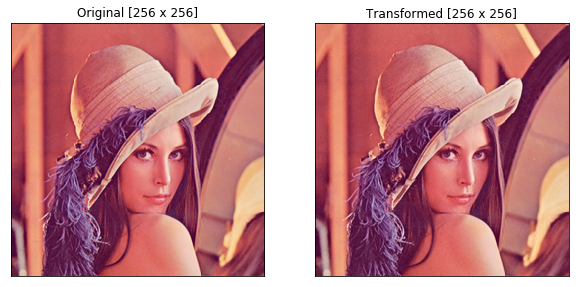

In [4]:
"""Decrease Jpeg compression of an image.

Args:
    quality_lower (float): lower bound on the jpeg quality. Should be in [0, 100] range
    quality_upper (float): upper bound on the jpeg quality. Should be in [0, 100] range

Targets:
    image

Image types:
    uint8, float32

Comment:
    Jpegに圧縮。
"""
trans = JpegCompression(quality_lower=99, quality_upper=100, always_apply=False, p=1.0)
imshow2(image, transforms=trans)

## ToFloat

In [5]:
"""Divide pixel values by `max_value` to get a float32 output array where all values lie in the range [0, 1.0].
If `max_value` is None the transform will try to infer the maximum value by inspecting the data type of the input
image.

See Also:
    :class:`~albumentations.augmentations.transforms.FromFloat`

Args:
    max_value (float): maximum possible input value. Default: None.
    p (float): probability of applying the transform. Default: 1.0.

Targets:
    image

Image types:
    any type

Comment:
    画像全体の行列を0~1の値に、型をfloat32に変換します。
"""
trans = ToFloat(max_value=None, always_apply=False, p=1.0)
print('=== original image ===')
print('max  :  {}'.format(image.max()))
print('min  :  {}'.format(image.min()))
print('type :  {}'.format(image.dtype))
float_image = trans(image=image)['image']
print('=== transformed image ===')
print('max  :  {}'.format(float_image.max()))
print('min  :  {}'.format(float_image.min()))
print('type :  {}'.format(float_image.dtype))

=== original image ===
max  :  255
min  :  0
type :  uint8
=== transformed image ===
max  :  1.0
min  :  0.0
type :  float32


## FromFloat

In [6]:
"""Take an input array where all values should lie in the range [0, 1.0], multiply them by `max_value` and then
cast the resulted value to a type specified by `dtype`. If `max_value` is None the transform will try to infer
the maximum value for the data type from the `dtype` argument.

This is the inverse transform for :class:`~albumentations.augmentations.transforms.ToFloat`.

Args:
    max_value (float): maximum possible input value. Default: None.
    dtype (string or numpy data type): data type of the output. See the `'Data types' page from the NumPy docs`_.
        Default: 'uint16'.
    p (float): probability of applying the transform. Default: 1.0.

Targets:
    image

Image types:
    float32

.. _'Data types' page from the NumPy docs:
   https://docs.scipy.org/doc/numpy/user/basics.types.html
   
Comment:
    float32型の画像行列をdtypeで指定した任意の型に変換する。
    dtypeにuint8,uint16,float32を指定した場合、max_valueに何も指定しなければ、0~1がその型の範囲全体に写像されます。
    その他の型を入れた場合はmax_valueに型を指定してください。
"""
trans = FromFloat(dtype='uint16', max_value=None, always_apply=False, p=1.0)
print('=== float image ===')
print('max  :  {}'.format(float_image.max()))
print('min  :  {}'.format(float_image.min()))
print('type :  {}'.format(float_image.dtype))
new_type_image = trans(image=image)['image']
print('=== transformed image ===')
print('max  :  {}'.format(new_type_image.max()))
print('min  :  {}'.format(new_type_image.min()))
print('type :  {}'.format(new_type_image.dtype))

=== float image ===
max  :  1.0
min  :  0.0
type :  float32
=== transformed image ===
max  :  65535
min  :  0
type :  uint16


## Lambda(使用法不明)

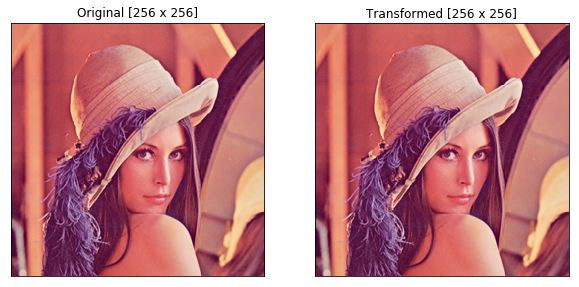

In [7]:
"""A flexible transformation class for using user-defined transformation functions per targets.
Function signature must include **kwargs to accept optinal arguments like interpolation method, image size, etc:



Args:
    image (callable): Image transformation function.
    mask (callable): Mask transformation function.
    keypoint (callable): Keypoint transformation function.
    bbox (callable): BBox transformation function.
    always_apply (bool): Indicates whether this transformation should be always applied.
    p (float): probability of applying the transform. Default: 1.0.

Targets:
    image, mask, bboxes, keypoints

Image types:
    Any

Comment:
    ターゲットごとに関数を与えることができると書かれていますが、使い方がわかりませんでした。
    get_paramsという関数がオーバーライドされていないので、ここを書き加えればできるかもしれません。
"""
trans = Lambda(image=None, mask=None, keypoint=None, bbox=None, always_apply=False, p=1.0)
imshow2(image, transforms=trans)

## RandomSnow

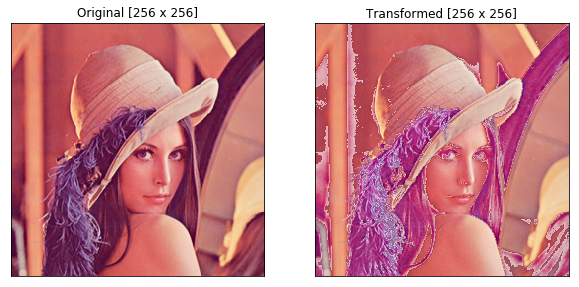

In [8]:
"""Bleach out some pixel values simulating snow.

From https://github.com/UjjwalSaxena/Automold--Road-Augmentation-Library

Args:
    snow_point_lower (float): lower_bond of the amount of snow. Should be in [0, 1] range
    snow_point_upper (float): upper_bond of the amount of snow. Should be in [0, 1] range
    brightness_coeff (float): larger number will lead to a more snow on the image. Should be >= 0

Targets:
    image

Image types:
    uint8, float32
    
Comment:
    雪をシミュレートしているらしい。HLS色空間に一度変換して処理しています。
"""

trans = RandomSnow(snow_point_lower=0.1, snow_point_upper=0.3, brightness_coeff=1.8, always_apply=False, p=1.0)
imshow2(image, transforms=trans)

## RandomRain

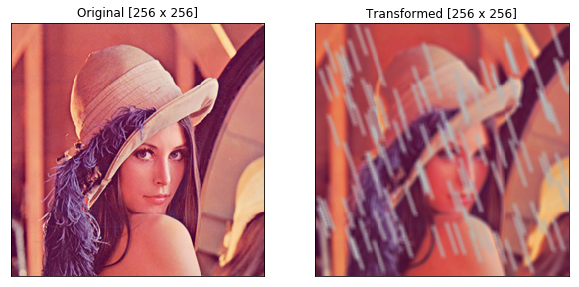

In [9]:
"""Adds rain effects.

From https://github.com/UjjwalSaxena/Automold--Road-Augmentation-Library

Args（非公式):
    slant_lower (int) : 雨粒のx軸方向の移動最小距離
    slant_upper (int) :　雨粒のx軸方向の移動最大距離
    drop_length (int) :　雨粒のy軸方向の移動距離
    drop_width (int) :　雨粒の太さ
    drop_color (int, int, int):　雨粒の色[r, g, b]
    blur_value (int): rainy view are blurry
    brightness_coefficient (float): rainy days are usually shady
    rain_type: [None, "drizzle", "heavy", "torrential"]


Targets:
    image

Image types:
    uint8, float32
    
Comment:
    雨のシミュレーション。
    
"""

trans = RandomRain(slant_lower=-10, slant_upper=10,
                   drop_length=16, drop_width=2,
                   drop_color=(200, 200, 200), blur_value=5,
                   brightness_coefficient=0.9, rain_type="heavy",
                   always_apply=False, p=1.0)
imshow2(image, transforms=trans)

## RandomFog

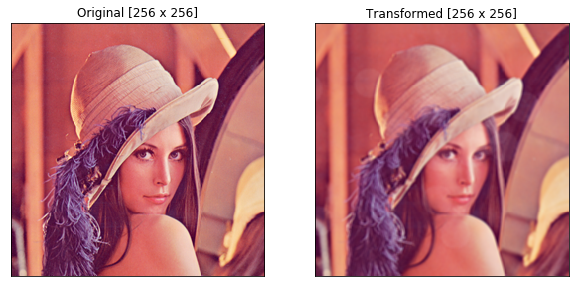

In [10]:
"""Simulates fog for the image

From https://github.com/UjjwalSaxena/Automold--Road-Augmentation-Library

Args:
    fog_coef_lower (float): lower limit for fog intensity coefficient. Should be in [0, 1] range.
    fog_coef_upper (float): upper limit for fog intensity coefficient. Should be in [0, 1] range.
    alpha_coef (float): transparence of the fog circles. Should be in [0, 1] range.

Targets:
    image

Image types:
    uint8, float32
    
Comment:
    霧のシミュレーション。擬似的な霧はalpha_coefで与えられたalpha値で半透明になった(fog_coef_lower, fog_coef_upper)の範囲から
    得られたfog_coefに対して、max(int(width // 3 * fog_coef), 10)で求まる半径の円で表現されている。
"""
trans = RandomFog(fog_coef_lower=0.3, fog_coef_upper=1.0, alpha_coef=0.2,
                  always_apply=False, p=1.0)
imshow2(image, transforms=trans)

## RandomSunFlare

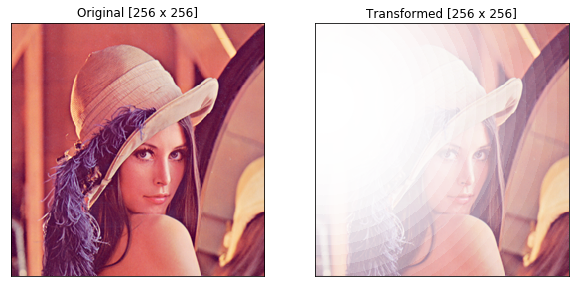

In [11]:
"""Simulates Sun Flare for the image

From https://github.com/UjjwalSaxena/Automold--Road-Augmentation-Library

Args:
    flare_roi (float, float, float, float): region of the image where flare will
                                                appear (x_min, y_min, x_max, y_max)
    angle_lower (float):
    angle_upper (float):
    num_flare_circles_lower (int): lower limit for the number of flare circles.
    num_flare_circles_upper (int): upper limit for the number of flare circles.
    src_radius (int):
    src_color (int, int, int): color of the flare

Targets:
    image

Image types:
    uint8, float32
    
Comment:
    太陽フレアのシュミレート。
"""

trans = RandomSunFlare(flare_roi=(0, 0, 1, 0.5), angle_lower=0, angle_upper=1,
                       num_flare_circles_lower=6, num_flare_circles_upper=10,
                       src_radius=400, src_color=(255, 255, 255), always_apply=False, p=1.0)

imshow2(image, transforms=trans)

## RandomShadow

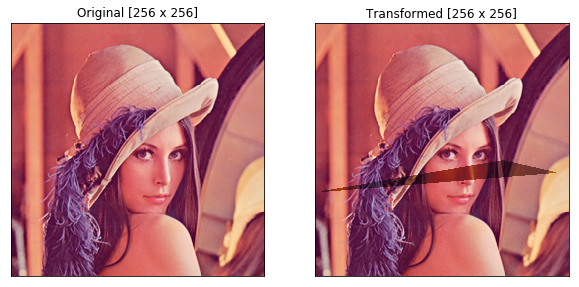

In [12]:
"""Simulates shadows for the image

From https://github.com/UjjwalSaxena/Automold--Road-Augmentation-Library

Args:
    shadow_roi (float, float, float, float): region of the image where shadows
        will appear (x_min, y_min, x_max, y_max)
    num_shadows_lower (int): Lower limit for the possible number of shadows.
    num_shadows_upper (int): Lower limit for the possible number of shadows.
    shadow_dimension (int): number of edges in the shadow polygons

Targets:
    image

Image types:
    uint8, float32
    
Comment:
    影のシミュレーション。
"""

trans = RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1,
                     num_shadows_upper=3, shadow_dimension=3, always_apply=False, p=1.0)

imshow2(image, transforms=trans)

## ToTensor

In [13]:
"""Convert image and mask to `torch.Tensor` and divide by 255 if image or mask are `uint8` type.
WARNING! Please use this with care and look into sources before usage.

Args:
    num_classes (int): only for segmentation
    sigmoid (bool, optional): only for segmentation, transform mask to LongTensor or not.
    normalize (dict, optional): dict with keys [mean, std] to pass it into torchvision.normalize

Comment:
    入力画像がuint8であれば255で割られます。マスク画像は、複数クラスであれば、クラス分のチャンネルのマスクにしてください。
    num_classes: セグメンテーションの場合。二値分類ならば、1にしてください。
    sigmoid: セグメンテーションの場合、マスク画像をLongTensorに変換するかどうか。 Falseであれば、多クラスでも2次元配列のマスクが返ります。
        各要素には、クラス番号が振られます。
    normalize: {'mean': [...], 'std': [...]}で正規化を行います。
"""

trans = ToTensor(num_classes=5, sigmoid=True, normalize=None)
print(mask.shape,mask.dtype)
transformed = trans(image=image_seg, mask=mask)
print(transformed['mask'].size(), transformed['mask'].dtype)

(720, 1280, 3) uint8
torch.Size([3, 720, 1280]) torch.float32
